In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
print(crimes.head())

       DR_NO   Date Rptd  ...  Status Desc                                 LOCATION
0  220314085  2022-07-22  ...  Invest Cont  2500 S  SYCAMORE                     AV
1  222013040  2022-08-06  ...  Invest Cont  3300    SAN MARINO                   ST
2  220614831  2022-08-18  ...  Invest Cont                        1900    TRANSIENT
3  231207725  2023-02-27  ...  Invest Cont  6200    4TH                          AV
4  220213256  2022-07-14  ...  Invest Cont  1200 W  7TH                          ST

[5 rows x 12 columns]


### Question 1: Which hour has the highest frequency of crimes?

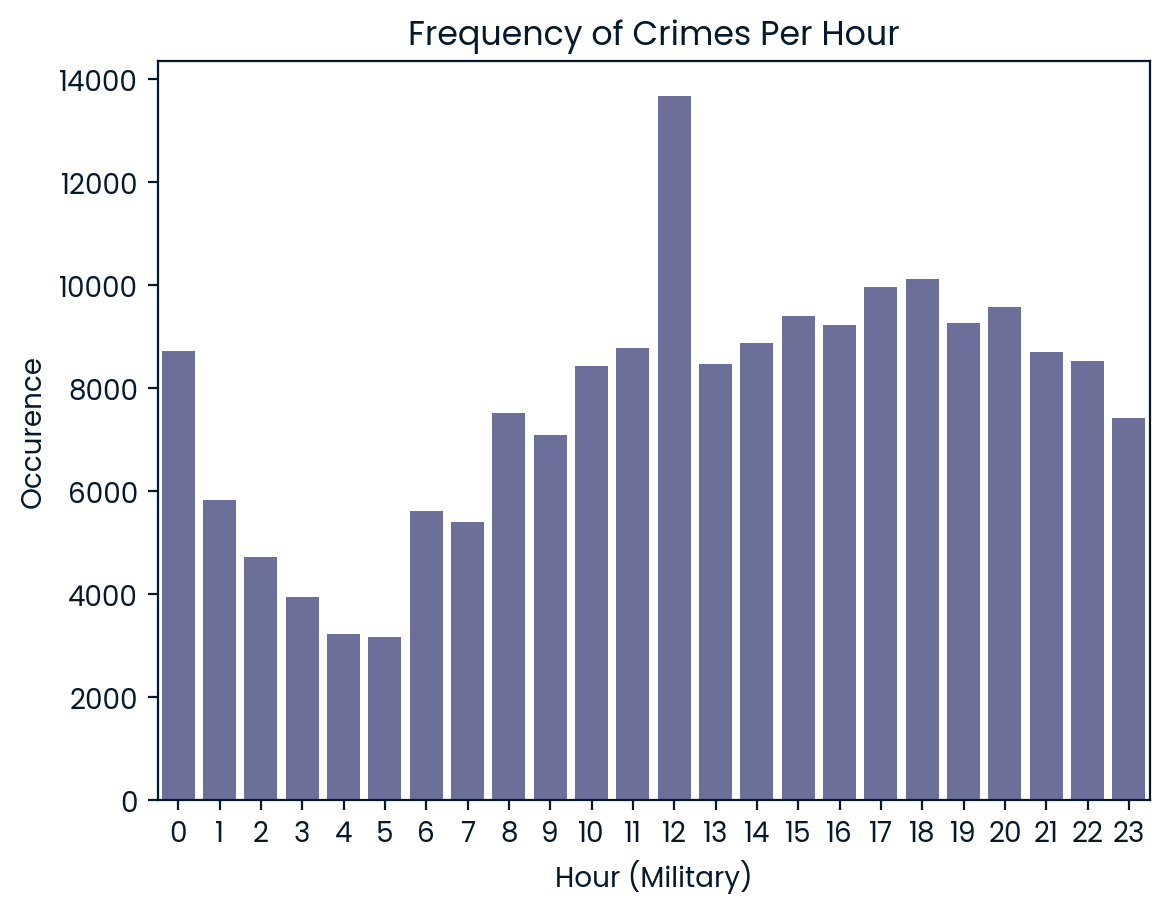

In [2]:
# extracting the hours
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)

# plotting the frequencies
sns.countplot(data = crimes, x = 'HOUR OCC').set(title = 'Frequency of Crimes Per Hour', xlabel = 'Hour (Military)', ylabel = 'Occurence')
plt.show()

In [3]:
# storing the hour as a variable
peak_crime_hour = crimes['HOUR OCC'].value_counts().idxmax()

print(f"The {peak_crime_hour}th hour has the highest frequency of crimes.")

The 12th hour has the highest frequency of crimes.


### Question 2: Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?

In [4]:
# subsetting for night hours
night_hours = [22, 23, 0, 1, 2, 3]

night_crimes = crimes[crimes['HOUR OCC'].isin(night_hours)]

# counting crime by area
crime_by_area = night_crimes.groupby('AREA NAME').size()

crime_by_area_sorted = crime_by_area.sort_values(ascending = False)

peak_night_crime_location = crime_by_area_sorted.index[0]

print(f"{peak_night_crime_location} has the largest frequency of night crimes.")

Central has the largest frequency of night crimes.


### Question 3: Identify the number of crimes committed against victims of different age groups.

In [5]:
# creating bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+']

crimes['Age Group'] = pd.cut(crimes['Vict Age'], bins = age_bins, labels = age_labels, include_lowest = True)

# adding a new column to the crimes DataFrame containing binned age bracket values
crimes['Age Bracket'] = pd.cut(
    crimes['Vict Age'], 
    bins = age_bins, 
    labels = age_labels,
    include_lowest = True
)

# counting crimes by victim age group
victim_ages = crimes['Age Bracket'].value_counts().sort_index()

print(victim_ages)

0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Age Bracket, dtype: int64
